In [24]:
!python3 ../preprocess/Main.py


 ############ Preprocess Data ############ 

💡 Clean all errored entries ... 

100%|███████████████████████████████| 115338/115338 [00:00<00:00, 136276.16it/s]

✅ 96456 lines selected from 115338

💡 Split the dataset into three subsets with a 90:5:5 ...
     
✅ 86810 Training lines
✅ 4823 Test lines
✅ 4823 Validation lines 

💡 Generate lists of paths & image names ...

100%|████████████████████████████████████| 4823/4823 [00:00<00:00, 21639.18it/s]

✅  lists Generated Successfully 
 
💡 Prepare Labels ... 

100%|████████████████████████████████| 86808/86808 [00:00<00:00, 1883527.97it/s]


✅  86808 Cleaned labels 
✅  79 Character
✅  21 Maximum word length  
 
💡 Generate the Files of Data ... 

100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 67.07it/s]

✅  Data Files generated Successfully 



# Import All Libreries

In [46]:
import matplotlib.pyplot as plt
from PIL import Image       
import numpy as np

# Import & Reload FunctionsFile.py

In [47]:
from importlib import reload
import FunctionsFile as f
reload(f)

<module 'FunctionsFile' from '/Users/book/Downloads/Learning/DataScienceWithPython/PFE/src/FunctionsFile.py'>

# Extract Data from .txt files

In [48]:
from FunctionsFile import *

train_img_paths,train_CleanedLabels,test_img_paths,test_CleanedLabels,validation_img_paths,validation_CleanedLabels,characters,max_len = ExtractData(
    'train_img_paths','train_CleanedLabels',
    'test_img_paths','test_CleanedLabels',
    'validation_img_paths','validation_CleanedLabels',
    'characters','max_len')
    

In [49]:
max_len = int(max_len[0])

print(f'''
Train Images : {len(train_img_paths)}
Train Labels : {len(train_CleanedLabels)}
Test Images : {len(test_img_paths)}
Test Labels: {len(test_CleanedLabels)}
Validation Images : {len(validation_img_paths)}
Validation Labels : {len(validation_CleanedLabels)}
Characters  : {len(characters)} 
Largest Word : {max_len}
''')


Train Images : 86808
Train Labels : 86808
Test Images : 4823
Test Labels: 4823
Validation Images : 4823
Validation Labels : 4823
Characters  : 79 
Largest Word : 21



# Some images with their labels with different sizes

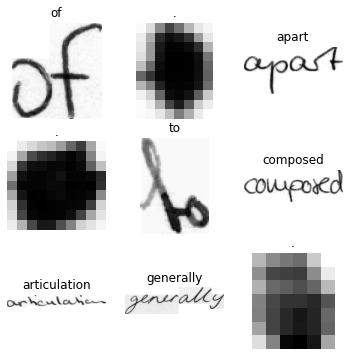

In [50]:
plt.figure(figsize=(6,6))

for i in range(9) : 
    img = Image.open(test_img_paths[i])
    plt.subplot(3,3,i+1)
    plt.axis('off') 
    plt.title(test_CleanedLabels[i])
    #img = img.resize((128,32))
    plt.imshow(img,cmap='gray')

# Resize all train, test, validation images

In [57]:
size = (90,60)
#Resized_train_img = resizeImages(train_img_paths,size)
Resized_test_img = resizeImages(test_img_paths,size)
Resized_validation_img = resizeImages(validation_img_paths,size)

#print(Resized_train_img.shape)
print(Resized_test_img.shape)
print(Resized_validation_img.shape)

(4823, 60, 90)
(4823, 60, 90)


# Plot the resized images (width = 96, height = 64)

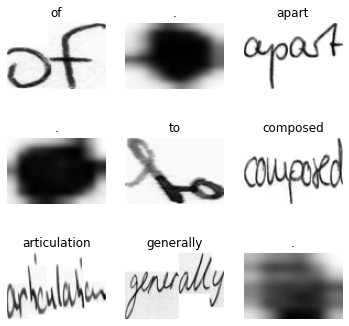

In [59]:
plt.figure(figsize=(6,6))

for i in range(9) : 
    img = Resized_test_img[i]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title(test_CleanedLabels[i])
    plt.imshow(img,cmap='gray')

# Reshape data 

In [1]:
Reshaped_train_img,Reshaped_test_img,Reshaped_validation_img = ReshapeData(Resized_train_img,Resized_test_img,Resized_validation_img)

# Convert to Category

In [5]:
#ConvertToCat(train_characters)